# QFT, QAdder and QMultiplier Functions

In [1]:
## Importing Packages

import cirq 
import numpy as np
from cirq.contrib.svg import SVGCircuit
import matplotlib.pyplot as plt

In [52]:
## Defining QFT and Inverse QFT

def qft_rotations(n_qubits):
    """A circuit performs the QFT rotations on the specified qubits.
    
    Args:
        n_qubits (list): List of qubits.
    """
    n = len(n_qubits)
    for i in range(n):
        k = 0
        yield cirq.H(n_qubits[i])
        for jj in range(i+1,n,1):
            k = k+1
            yield (cirq.CZ ** (1/(2**(k))))(n_qubits[jj], n_qubits[i])
    pass

def inverse_qft(n_qubits):
    """A circuit performs the inverse of QFT rotations on the specified qubits.
    
    Args:
        n_qubits (list): List of qubits.
    """
    n = len(n_qubits)
    n_qubits1 = np.flip(n_qubits)
    for i in range(n):
        k = 0
        yield cirq.H(n_qubits1[i])
        for jj in range(i+1,n,1):
            k = k+1
            yield (cirq.CZ ** (-1/(2**(k))))(n_qubits1[jj], n_qubits1[i])

In [53]:
# """Visually check the inverse QFT circuit."""
# qubits = cirq.LineQubit.range(4)
# qft = cirq.Circuit(inverse_qft(qubits))
# SVGCircuit(qft)

In [54]:
"""Visually check the QFT circuit."""
qubits = cirq.LineQubit.range(2)
qft = cirq.Circuit(qft_rotations(qubits))
SVGCircuit(qft)
cirq.unitary(qft)

array([[ 0.5+0.j ,  0.5+0.j ,  0.5+0.j ,  0.5+0.j ],
       [ 0.5+0.j , -0.5+0.j ,  0.5+0.j , -0.5+0.j ],
       [ 0.5+0.j ,  0. +0.5j, -0.5+0.j ,  0. -0.5j],
       [ 0.5+0.j ,  0. -0.5j, -0.5+0.j ,  0. +0.5j]])

In [106]:
#Defining Quantum Adder

def quantum_adder(n_qubits):
    ''' A circuit performs addition of two numbers 
    
    Args:
        n_qubits (list): list of qubits representing the binary representation of ('binary(a)'+'binary(b)').
    '''
    n = len(n_qubits)
    # Appending the first half of the qubits to list - kk
    kk =[n_qubits[i] for i in range(0, int(len(n_qubits)/2),1)]
    # Perfoms QFT on the first half of the qubits, i.e, on the first number
    yield qft_rotations(kk)
    for i in range(0,int(n/2),1):
        k=0
        for j in range(i+int(n/2),(n),1):
            yield (cirq.CZ ** (1/(2**(k))))(n_qubits[j], n_qubits[i])
            k+=1
    yield inverse_qft(kk)

In [107]:
circuit = cirq.Circuit()
# Inputting the two integers in a and b
a = int(input("Enter the first number: "))
b = int(input("Enter the second number: "))
c = max(len(np.binary_repr(a)), len(np.binary_repr(b))) + 1
a_bit = np.binary_repr(a, width = c)
b_bit = np.binary_repr(b, width = c)
# Combined form of binary(a) and binary(b)
c1 = a_bit+b_bit
qubits = cirq.LineQubit.range(len(c1))
# Preparing Basis State for c1 by applying X-gate on the qubit corresponding to the index of c1 being 1
circuit.append(cirq.X(qubits[i]) for i in range(len(c1)) if c1[i]=='1')
circuit.append(quantum_adder(qubits))
# Measuring the first half of the qubits
k = [qubits[i] for i in range(0, int(len(qubits)/2),1)]
circuit.append(cirq.measure(k, key = 'ab'))
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1)
# print(result.data)
c = result.histogram(key="ab")
# Retrieving the result from Counter
print(list(c)[0])

# print(cirq.ResultDict('ab'))
# cirq.plot_state_histogram(result)
# SVGCircuit(circuit)

Enter the first number: 6
Enter the second number: 9
15


In [113]:
def quantum_multiplier(n_qubits):
    ''' A circuit performs multiplication of two numbers 
    
    Args:
        n_qubits (list): list of qubits representing the binary representation of ('binary(a)'+'binary(b)').
    '''
    n = len(n_qubits)
    # Appending the first half of the qubits to list - kk
    kk =[n_qubits[i] for i in range(0, int(len(n_qubits)/2),1)]
    # Perfoms QFT on the first half of the qubits, i.e, on the first number
    yield qft_rotations(kk)
    for i in range(int(3*n/4), n,1):
        for j in range(int(n/2), int(3*n/4),1):
            for m in range(int(n/2)):
                yield (cirq.CCZ ** (1/(2**(-(5*n/4)-m+j+i+1))))(n_qubits[j], n_qubits[i], n_qubits[m])
    yield inverse_qft(kk)
    pass

In [114]:
circuit = cirq.Circuit()
# Inputting the two integers in a and b
a = int(input("Enter the first number: "))
b = int(input("Enter the second number: "))
c = max(len(np.binary_repr(a)), len(np.binary_repr(b))) + 1
a1 = np.binary_repr(0, width = 2*c)
a_bit = np.binary_repr(a, width = c)
b_bit = np.binary_repr(b, width = c)
# Combined form of binary(0), binary(a) and binary(b)
c1 = a1 + a_bit+b_bit
qubits = cirq.LineQubit.range(len(c1))
# Preparing Basis State for c1 by applying X-gate on the qubit corresponding to the index of c1 being 1
circuit.append(cirq.X(qubits[i]) for i in range(len(c1)) if c1[i]=='1')
circuit.append(quantum_multiplier(qubits))
k = [qubits[i] for i in range(0, int(len(qubits)/2),1)]
# Measuring the first half of the qubits
circuit.append(cirq.measure(k, key = 'ab'))
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1)
# print(result.data)
c = result.histogram(key="ab")
# Retrieving the result from Counter
print(list(c)[0])
# SVGCircuit(circuit)

Enter the first number: 5
Enter the second number: 6
30


# Simulating with simulate() and run() method

In [115]:
# a = 3
# b = 2
# a_bit = np.binary_repr(a)
# # print(a_bit)
# b_bit = np.binary_repr(b)
# # print(a_bit+ b_bit)
# c = a_bit+b_bit
# print(c)
# qubits = cirq.LineQubit.range(len(c))
# # print(k,f,g,h)
# circuit = cirq.Circuit(quantum_adder(qubits))
# SVGCircuit(circuit)
# state2 = cirq.Simulator().simulate(circuit, initial_state=1110).state_vector()
# print(state2)
# print(cirq.dirac_notation(state2))
# circuit.append(cirq.measure(qubits))
# simulator = cirq.Simulator()
# result = simulator.run(circuit, repetitions=2)
# print(result)
# SVGCircuit(circuit)

In [116]:
# k = cirq.big_endian_int_to_bits(3, bit_count = 4)
# print(k)

In [117]:
# for i in range(len(qubits)):
#     qubits[i] = np.pad(np.array([k[i]]), (2*len(qubits)-1,0))

# Making Custom Gates

In [2]:
class MyGate(cirq.Gate):
    def _init_(self):
        super(MyGate, self)
        
    def _num_qubits_(self):
        return 1
    def _circuit_diagram_info_(self, args):
        return "MyGate"

In [3]:
class MyGate(cirq.Gate):
    def _init_(self):
        super(MyGate, self)
        
    def _num_qubits_(self):
        return 1
    
    def _unitary_(self):
        return np.array([[1,0], [0,1]])
    
    def _circuit_diagram_info_(self, args):
        return "MyGate"

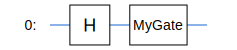

In [4]:
mygate = MyGate()

qubits = cirq.LineQubit(0)
circuit = cirq.Circuit([cirq.H(qubits), mygate(qubits)])
SVGCircuit(circuit)

In [36]:
class MG(cirq.Gate):
    def __init__(self, k):
        super(MG, self)
        self.k = k
    
    def _num_qubits_(self):
        return 2
    
    def _unitary_(self):
        return np.array([[1,0,0,0],
                         [0,1,0,0],
                         [0,0,1,0],
                        [0,0,0, np.sin(self.k)]])
    
    def _circuit_diagram_info_(self, args):
        return "ctrl", f"R({self.k})"

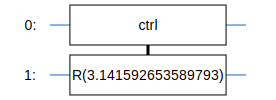

In [40]:
mg = MG(k=np.pi)
qubits = cirq.LineQubit.range(2)
circuit = cirq.Circuit(mg(*qubits))

SVGCircuit(circuit)

In [38]:
cirq.unitary(circuit)

array([[1.0000000e+00+0.j, 0.0000000e+00+0.j, 0.0000000e+00+0.j,
        0.0000000e+00+0.j],
       [0.0000000e+00+0.j, 1.0000000e+00+0.j, 0.0000000e+00+0.j,
        0.0000000e+00+0.j],
       [0.0000000e+00+0.j, 0.0000000e+00+0.j, 1.0000000e+00+0.j,
        0.0000000e+00+0.j],
       [0.0000000e+00+0.j, 0.0000000e+00+0.j, 0.0000000e+00+0.j,
        1.2246468e-16+0.j]])

In [63]:
## QFT gate
class QFT(cirq.Gate):
    def __init__(self, n_qubits):
        super(QFT, self)
        self.n_qubits = n_qubits
        

    def _num_qubits_(self):
        return self.n_qubits

    def _decompose_(self, n_qubits):
        n = len(n_qubits)
        for i in range(n):
            k = 0
            yield cirq.H(n_qubits[i])
            for jj in range(i+1,n,1):
                k = k+1
                yield (cirq.CZ ** (1/(2**(k))))(n_qubits[jj], n_qubits[i])

    def _circuit_diagram_info_(self, args):
        return ["QFT"] * self.num_qubits()
    
# qubits = cirq.LineQubit.range(2)
# circuit = cirq.Circuit(QFT(n_qubits = 2).on(*qubits))
# SVGCircuit(circuit)
# cirq.unitary(circuit)

In [71]:
## Quantum Multiplier gate

class qmulti(cirq.Gate):
    def __init__(self, n_qubits):
        super(qmulti, self)
        self.n_qubits = n_qubits
        

    def _num_qubits_(self):
        return self.n_qubits
    
    def _decompose_(self, n_qubits):
        n = len(n_qubits)
        kk =[n_qubits[i] for i in range(0, int(len(n_qubits)/2),1)]
        yield QFT(n_qubits = int(n/2)).on(*kk)
        for i in range(int(3*n/4), n, 1):
            for j in range(int(n/2), int(3*n/4),1):
                for m in range(int(n/2)):
                    yield (cirq.CCZ ** (1/(2**(-(5*n/4)-m+j+i+1))))(n_qubits[j], n_qubits[i], n_qubits[m])
        yield cirq.inverse(QFT(n_qubits = int(n/2)).on(*kk))
    
    def _circuit_diagram_info_(self, args):
        return ["QMultiplier"] * self.num_qubits()

In [72]:
circuit = cirq.Circuit()
# Inputting the two integers in a and b
a = int(input("Enter the first number: "))
b = int(input("Enter the second number: "))
c = max(len(np.binary_repr(a)), len(np.binary_repr(b))) + 1
a1 = np.binary_repr(0, width = 2*c)
a_bit = np.binary_repr(a, width = c)
b_bit = np.binary_repr(b, width = c)
# Combined form of binary(0), binary(a) and binary(b)
c1 = a1 + a_bit+b_bit
qubits = cirq.LineQubit.range(len(c1))
# Preparing Basis State for c1 by applying X-gate on the qubit corresponding to the index of c1 being 1
circuit.append(cirq.X(qubits[i]) for i in range(len(c1)) if c1[i]=='1')
circuit.append(qmulti(n_qubits = len(qubits)).on(*qubits))
k = [qubits[i] for i in range(0, int(len(qubits)/2),1)]
# Measuring the first half of the qubits
circuit.append(cirq.measure(k, key = 'ab'))
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1)
c = result.histogram(key="ab")
# Retrieving the result from Counter
print(list(c)[0])

Enter the first number: 2
Enter the second number: 3
6
